In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('zoo.csv')

In [4]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.animal_name.shape

(101,)

In [6]:
le=LabelEncoder()

In [7]:
le.fit(df.animal_name)

LabelEncoder()

In [8]:
le.transform(df.animal_name)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [9]:
import seaborn as sns

In [10]:
df.animal_name=le.transform(df.animal_name)

In [11]:
df.animal_name = pd.Series(df.animal_name)

In [12]:
import matplotlib.pyplot as plt

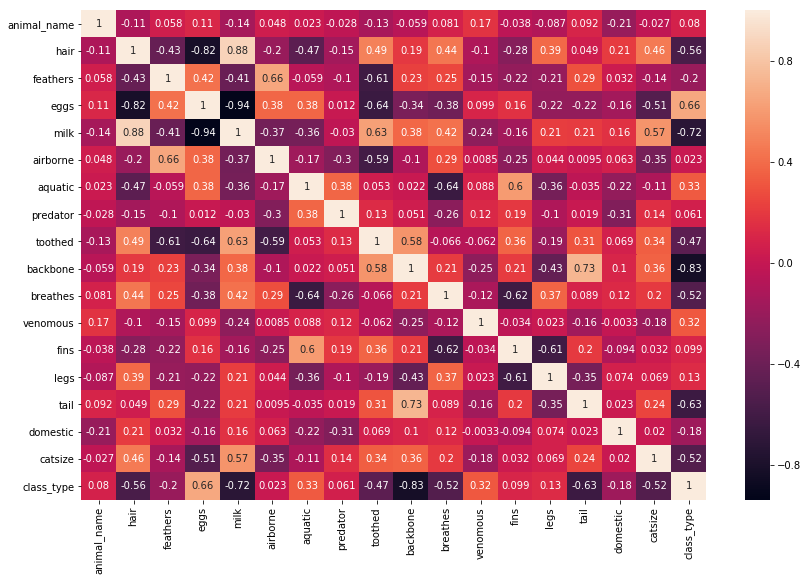

In [13]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),annot=True)

In [14]:
output=df.class_type

In [15]:
input=df[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','venomous','legs']]

In [16]:
input.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,venomous,legs
0,1,0,0,1,0,0,1,1,0,4
1,1,0,0,1,0,0,0,1,0,4
2,0,0,1,0,0,1,1,1,0,0
3,1,0,0,1,0,0,1,1,0,4
4,1,0,0,1,0,0,1,1,0,4


In [17]:
input.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,venomous,legs
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.079208,2.841584
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.271410,2.033385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model_tree=DecisionTreeClassifier()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
input_train,input_test,output_train,output_test=train_test_split(input,output,test_size=0.4)

In [22]:
model_tree.fit(input_train,output_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
model_prediction=model_tree.predict(input_test)

In [24]:
model_prediction

array([2, 1, 4, 2, 1, 6, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 2, 1, 7,
       2, 1, 7, 4, 1, 4, 7, 1, 4, 2, 4, 4, 1, 4, 1, 1, 2, 1, 4],
      dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
scored_accuracy_from_tree_model=accuracy_score(model_prediction,output_test)

In [27]:
scored_accuracy_from_tree_model

0.8536585365853658

In [28]:
score=accuracy_score(model_prediction,output_test)
score

0.8536585365853658